<a href="https://colab.research.google.com/github/smirnovaanastasia1234/MOMO_Task-4/blob/main/%D0%9C%D0%9E%D0%9C%D0%9E_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2_%D0%9A%D0%9B%D0%90%D0%A1%D0%A2%D0%95%D0%A0%D0%98%D0%97%D0%90%D0%A6%D0%98%D0%AF_%D0%9A_%D0%A1%D0%A0%D0%95%D0%94%D0%9D%D0%98%D0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическое задание №4_Часть 2_КЛАСТЕРИЗАЦИЯ К-СРЕДНИХ**



# **Import библиотек**

In [467]:
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
from google.colab import files 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
from google.colab import files 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons, make_circles

from sklearn import datasets, svm, metrics
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [391]:
plt.style.use('dark_background')

# **КЛАСТЕРИЗАЦИЯ К-СРЕДНИХ**

# **Синтетические данные**

In [392]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    """Визуализация двумерных  данных для классификации   
    Входные переменные:
    ===========
    ax: отдельная ячейка объекта figure
    ds: набор данных, содержащий признаки X и целевые метки y
    name: название графика
    marker: тип маркера - по умолчанию просто круги
    colors: цвета, которые будут использоваться для раскраски разных классов - по умолчанию Красный и Синий
    alpha: прозрачность маркеров
    s: размер маркера (~ квадрат радиуса)
    facecolor:
    """
    
    X, y = ds # распаковываем признаки и целевые метки в отдельные переменные

    cm_bright = ListedColormap(colors) # формируем цветовую карту из наших цветов
    ax.set_title(name, fontsize = 30) # прописываем название графика
    if facecolor: # если переменная задана - то просто рисуем скатерограмму по признакам с использованием параметров маркеров
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else: # иначе так же рисуем скатерограмму, но без
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)
    # немного красоты и ля аккуратности
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # фиксируем минимальные и максимальные значения по горизонтали
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # фиксируем минимальные и максимальные значения по вертикали
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [393]:
def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42):
    """Создание синтетического набора данных 
    для бинарной классификации   
    Входные переменные:
    ===========
    N: количество точек
    method: тип набора данных 
    noises: коэффициент ~ сила шума
    random_state: фиксированный сид случайных чисел (для повторяемости)
    """
    # фиксируем случайный seed
    if random_state: rng = np.random.RandomState(seed = random_state)
    
    if method == 'line' or method is None:
        # если выбран метод line (или никакой не задан)
        # то мы создаем набор данных с использованием функции make_classification
        # это будут линейно-разделимые данные
        X, y = make_classification(n_samples=N, # количество точек
                                   n_features=2, # количество признаков
                                   n_redundant=0, # количество бесполезных признаков
                                   n_informative=2,# количество информативных признаков
                                   n_clusters_per_class=1, # количество групп точек на класс 
                                   class_sep=2, # количество классов
                                   random_state=random_state # фиксированный сид случайных чисел
                                   )
        X += np.random.randn(*X.shape) *noises # добавляем к признакам случайный шум
    
    elif method == 'moons':
        # если выбран метод moons 
        # то мы создаем набор данных с использованием функции make_moons
        # это будут данные похожие на Инь-Ян
        X, y = make_moons(n_samples=N, # количество точек
                          noise=noises, # уровень шума
                          random_state=random_state # фиксированный сид случайных чисел
                          )
    
    elif method == 'circles':  
        # если выбран метод circles 
        # то мы создаем набор данных с использованием функции make_circles
        # это будут данные в виде концентрических окружностей 
        X, y = make_circles(n_samples=N, # количество точек
                            noise=noises, # уровень шума
                            factor=0.5, # соотношение радиусов внуренней и внешней окружности
                            random_state=random_state # фиксированный сид случайных чисел
                            )

    
    return X,y

In [394]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter        
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------    
    def distance(self,X1, X2):
        # оценка расстояния
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)  
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)      
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        # инициализация первых центров кластеров
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        # оценка пренадлежности точек к кластеру по расстоянию
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1) 
    #-------------------------------------
    def transform(self,X):
        # получение предсказаний
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        # оценка относительного изменения центров кластеров
        return (
                self.distance(self.centroids,old_centroids)/
                self.distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):
        # обучение - несколько итераций алгоритма к-Средних
        if self.centroids is None: # если центры кластеров не заданы - задаем
            self.centroids = self.init_centroids(X)
    
        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)
            
            cluster_label = self.predict(X)

            for k in range(self.n_clusters):
                
                c_idxs = np.flatnonzero(cluster_label==k)
                
                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self        
    #-------------------------------------
    def fit_transform(self, X):
        # и обучаем и сразу выдаем метки кластеров
        return self.fit(X).predict(X)

In [395]:
def init_centroids(X, n_clusters, random_state = 42):
    """Инициализация центроидов  
    Входные переменные:
    ===========
    X: признаки
    n_clusters: ожидаемое количество кластеров
    random_state: фиксированный сид случайных чисел (для повторяемости)  
    """
    if random_state: rng = np.random.seed(random_state) # фиксируем случайный seed
    # выбираем n_clusters случайных индексов из диапазона от 0 до количества точек в даннных
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters) 
    return X[centroid_idxs,:] # центры кластеров - точки с выбранными индексами



In [396]:
def predict(X, n_clusters, centroids, metric = 'euclidean', p = 2):
    """Предсказание кластера  
    Входные переменные:
    ===========
    X: признаки
    n_clusters: ожидаемое количество кластеров
    centroids: текущие центры кластеров
    metric: тип метрики расстояния
    p: степень для Метрики минковского 
    """    
    # заполняем матрицу расстояний нулями. размерность матрицы число точек на число кластеров
    distances = np.zeros((X.shape[0], n_clusters))
    # перибираем каждый центроид
    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X, metric, p)#расчитываем расстояние от центра до всех точек
        # используем ранее написанную функцию поиска расстояний
    cluster_label = np.argmin(distances,axis = 1) # находим ближайший центр для каждой точки
    return cluster_label, distances # возвращаем метки кластеров и матрицу расстояний

In [397]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):
    """Визуализация кластера  
    Входные переменные:
    ===========
    X: признаки
    centroids: текущие центры кластеров
    cluster_label: метки кластеров для признаков
    centroids_label: метки для текущих центров кластеров
    old_centroids: предыдущие центры кластеров
    old_centroids_label: метки для предыдущих центров кластеров
    """       
    fig = plt.figure(figsize=(11,10)) # Создаем полотно
    # Визуализируем наши признаки
    plt.scatter(X[:, 0], X[:, 1], 
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    # Визуализируем текущие центры кластеров. Как точки, но побольше
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')
    
    if old_centroids is not None: # если хотим визуализировать предыдущие центры кластеров
        # их отрисуем поменьше, чем текущие центры, но больше чем "рядовые точки"
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k') 

In [398]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        
        # расчет матрицы ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #индексы сортировки по значениям собственных векторов
        
        # сортируем собственные вектора и значения
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(12,4)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'-o', label='all eigvalues')
        plt.plot(self.values[:self.n_components],'-o', label='eigen subspace')
        plt.title('eigenvalues');plt.legend();plt.show()
    

## **Инь-Ян**

In [399]:
X_moons, y_moons = make_moons(n_samples=400, noise=0.25, random_state=42)

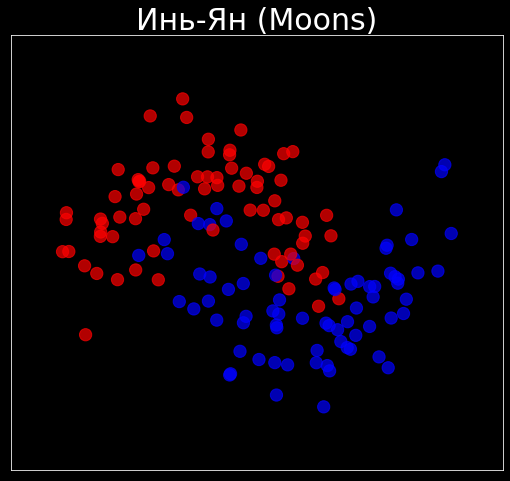

In [400]:
N = 150 
noises = 0.25 

fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons',
                             noises = noises), 
          'Инь-Ян (Moons)')

Рассчитаем расстояние через функции

С возможностью выбора метрики

In [401]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    if metric == 'euclidean':
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        dist = np.max(np.abs(X1 - X2).T,axis=0)  
    if metric == 'Minkowski':
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)      
    return dist

Посмотрим на одних данных как будут показывать себя различные метрики расстояния

In [402]:
metrics = ['euclidean','cityblock','Chebyshev','Minkowski']

Перебирем их все и проверим для определения расстояния между двумя векторами (0-ая и 1-ая точка)

In [403]:
for metric in metrics:
    print(distance(X_moons[0], X_moons[1],metric = metric, p = 10))

1.1932569464351774
1.6862450887822586
0.8759165262678434
0.9096485850536232


Оценка оптимального числа кластеров по методу Локтя

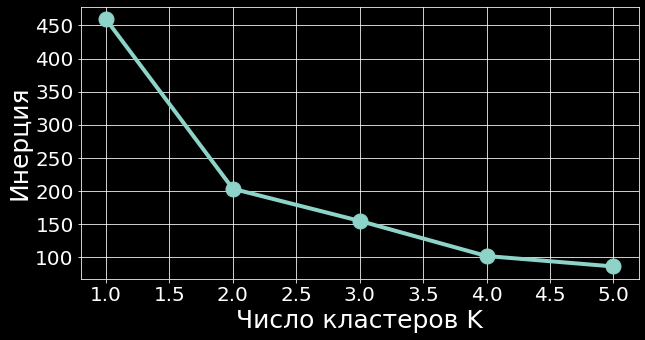

In [404]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_moons)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(FontSize = 20)
plt.yticks(FontSize = 20);

посмотрим как это работает для двух кластеров

In [405]:
n_clusters = 2
centroids = init_centroids(X_moons, n_clusters)
print(centroids)

[[ 1.25567408  0.38121589]
 [ 0.49885953 -0.16209332]]


Мы остановились на итерации:: 5


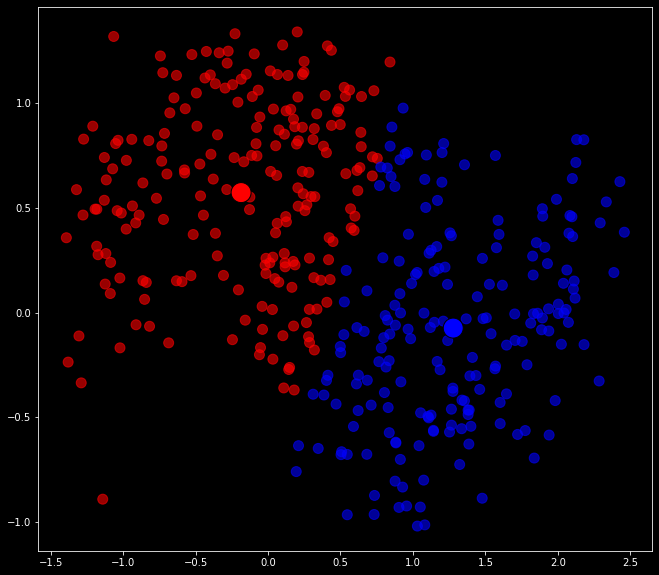

In [406]:
kmeans   = KMeans(n_clusters=2,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_moons)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X_moons,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

посмотрим как это работает для 4 кластеров

In [407]:
n_clusters = 4
centroids = init_centroids(X_moons, n_clusters)
print(centroids)

[[ 1.25567408  0.38121589]
 [ 0.49885953 -0.16209332]
 [ 0.82298429  0.69134112]
 [ 1.01814969  0.18202428]]


Мы остановились на итерации:: 8


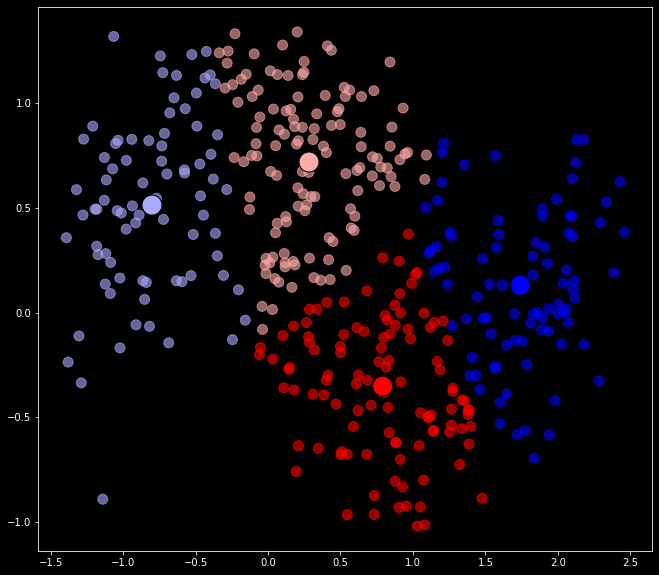

In [408]:
kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_moons)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X_moons,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

Видно, что стало кучней

In [409]:
pd.crosstab(y_moons,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3
Метки,,,,
0,17,73,92,18
1,71,7,32,90


## **Круги**

In [410]:
X_circle, y_circle = make_circles(n_samples=400, noise=0.09, random_state=42)

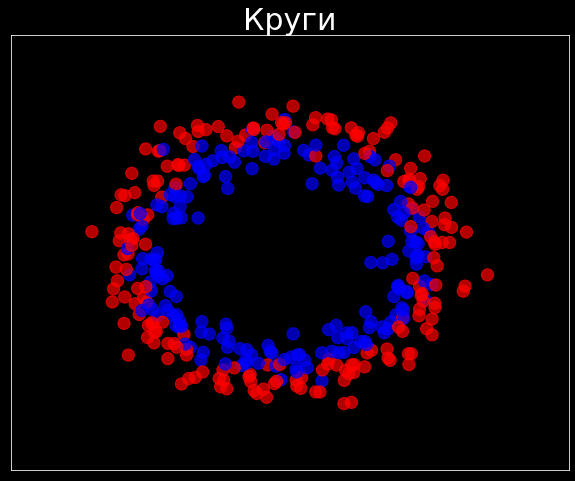

In [411]:
fig = plt.figure(figsize= (10,8))
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X_circle, y_circle), 'Круги')

Рассчитаем расстояние через функции

С возможностью выбора метрики

In [412]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    if metric == 'euclidean':
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        dist = np.max(np.abs(X1 - X2).T,axis=0)  
    if metric == 'Minkowski':
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)      
    return dist

Посмотрим на одних данных как будут показывать себя различные метрики расстояния

In [413]:
metrics = ['euclidean','cityblock','Chebyshev','Minkowski']

Перебирем их все и проверим для определения расстояния между двумя векторами (0-ая и 1-ая точка)

In [414]:
for metric in metrics:
    print(distance(X_circle[0], X_circle[1],metric = metric, p = 10))

1.3891674195266148
1.5948245360969402
1.3710207882980492
1.3710207901399964


Оценка оптимального числа кластеров по методу Локтя

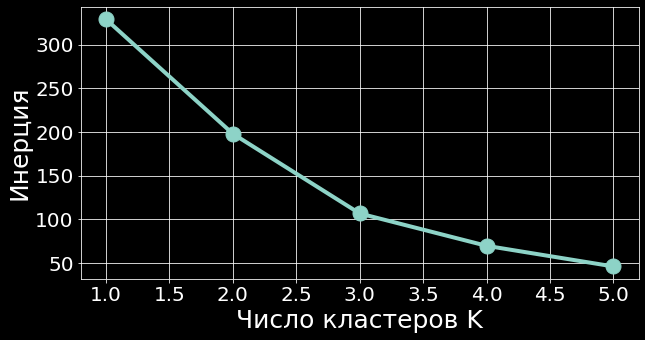

In [415]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_circle)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(FontSize = 20)
plt.yticks(FontSize = 20);

Посмотрим для 3 кластеров

Мы остановились на итерации:: 4


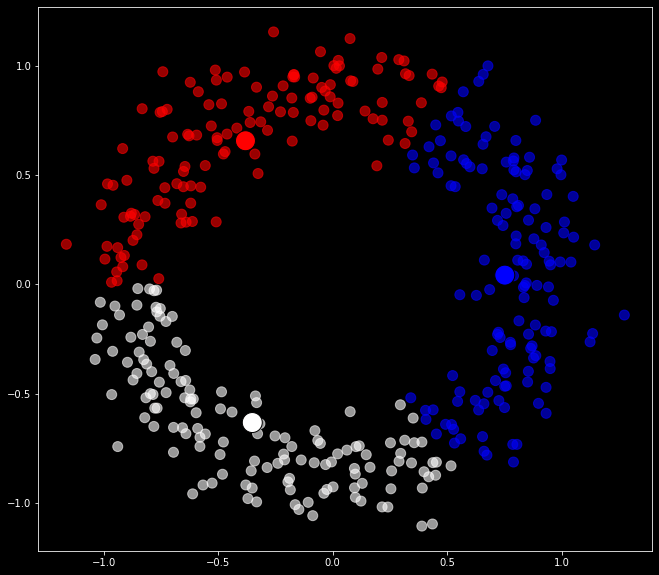

In [416]:
kmeans   = KMeans(n_clusters=3,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_circle)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X_circle,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

Посмотрим для 5 кластеров

Мы остановились на итерации:: 7


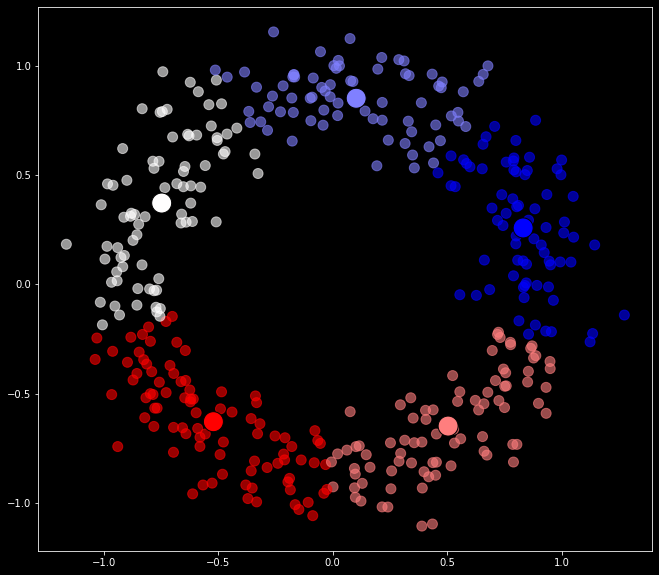

In [417]:
kmeans   = KMeans(n_clusters=5,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X_circle)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X_circle,kmeans.centroids, 
             c_labels, np.unique(c_labels),)

In [418]:
pd.crosstab(y_circle,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3,4
Метки,,,,,
0,37,37,39,41,46
1,36,37,41,43,43


# **Набор данных MNIST**

In [468]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):
        # обучение - в этом случае сводится к нахождению собственных значений и собственных векторов

        self.mean = np.mean(X, axis=0) # оценка среднего для каждого признака
        
        # Считаем матрицу ковариации, используя функцию библиотеки Numpy
        cov_matrix = np.cov(X - self.mean, rowvar = False) # не забываем вычитать среднее
        

        # считаем собственные значания и собственные вектора матрицы ковариации
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) # для этого тоже есть функция Numpy 


        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию собственных значений
        
        # Берём первые n собственных векторов
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx] # отсортированные собственные значения
        
        return self
    
    #--------------------------------
    def transform(self, X):
        # преобразование признаков в пространство главных компонент
        X = X - self.mean #вычитаем среднее
        return np.dot(X, self.components) #находим проекции признаков на собственные вектора (через скалярное произведение)
        #это и будут главные компоненты
    #--------------------------------
    def fit_transform(self, X):
        # 2 в 1: обучаем и прелбразуем
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        # обратное преобразование
        # Главные компоненты скалярно домножаем на собственные вектора
        return np.dot(X_new, self.components.T) + self.mean # не забываем обратно добавить среднее
    #--------------------------------
    def score(self, X):
        # оцека "качества" восстановления, через коэффициент детерминации
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        # метод для отрисовки собственных значений (объясненной дисперсии)
        plt.figure(figsize=figsize)
        # отдельно мелкими точками визуализируем все собственные значения
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        # крупными маркерами - выбранное нами количество гласвных компонент
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(FontSize = 25); plt.yticks(FontSize = 25);
        plt.tight_layout();      

In [452]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
# для этого нам необходимо знать имя набора данных и версию
# также указываем что хотим чтобы скачалось в формате признаки/целевые метки (return_X_y)
# иначе он выгрузит в формате словаря с полной выкладкой
# наконец попросим выгрузить данные в формате dataframe (as_frame)
# иначе будут numpy массивы
X_MNIST, y_MNIST  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)
X_MNIST = X_MNIST / 255. # нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1
X_ = X_MNIST.values # отдельно сохраним данные в формате numpy

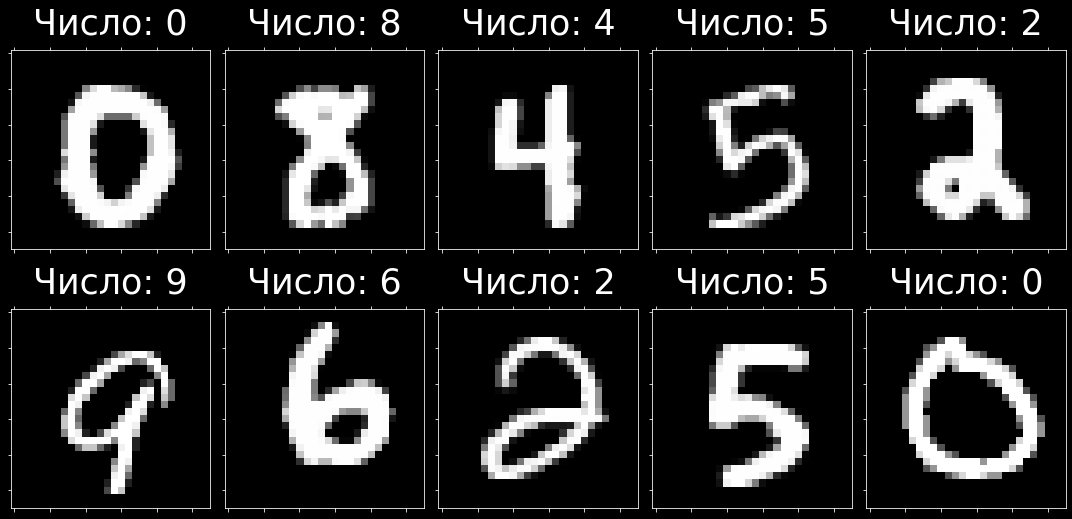

In [469]:
n = 25399
fig = plt.figure( figsize=(15,8) )
for i in range(0,10):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Число: {}".format(str(y_MNIST[i+n]) ), size=35)
  ax.matshow(1-X_MNIST.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
             cmap='Greys')
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  plt.tight_layout()

In [470]:
pca = PCA(n_components = 100)
pca.fit(X_)
pca.score(X_)

0.9398662110143557

Оцениваем пространство главных компонент

In [471]:
pca_result_mnist = pca.transform(X_)

Восстанавливаем исходные изображения из 100 главных компонент

In [472]:
pca_inverse = pca.inverse_transform(pca_result_mnist)

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X_MNIST, y_MNIST, test_size=0.2, random_state=12)

Предварительная обработка изображений MNIST

In [474]:
model = KNeighborsClassifier(n_neighbors = 4)

In [475]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Делаем предсказания с помощью алгоритма K-ближайших соседей

In [476]:
predictions = model.predict(X_test)
predictions

array(['3', '7', '1', ..., '5', '7', '2'], dtype=object)

Оценка точности нашей модели

In [477]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1358
           1       0.97      1.00      0.98      1596
           2       0.98      0.97      0.98      1403
           3       0.96      0.98      0.97      1450
           4       0.97      0.97      0.97      1327
           5       0.96      0.97      0.97      1249
           6       0.98      0.98      0.98      1367
           7       0.97      0.97      0.97      1459
           8       0.99      0.94      0.96      1413
           9       0.96      0.96      0.96      1378

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



Сгнерируем матрицу ошибок

In [478]:
print(confusion_matrix(y_test, predictions))


[[1350    0    1    0    1    1    3    0    0    2]
 [   1 1589    1    0    0    1    0    3    0    1]
 [  16    8 1357    3    1    0    0   13    4    1]
 [   1    2    8 1416    0    8    0    5    3    7]
 [   0   10    1    1 1291    0    3    2    0   19]
 [   4    0    0   17    1 1209   11    2    1    4]
 [   8    4    1    0    4    7 1343    0    0    0]
 [   1   21    4    1    3    1    0 1421    0    7]
 [   4    9    6   22    5   24    5    4 1325    9]
 [   2    2    1   10   19    5    0   20    3 1316]]


Судя по метрикам модель уже достаточно эффективна

Создадим набор данных из 200 семплов, который имеет 2 показателя и 4 кластерных центров. Стандартное отклонение для каждого кластера будет равно 1.8.

In [479]:
raw_data = make_blobs(
    n_samples = 200, 
    n_features = 2, 
    centers = 4, 
    cluster_std = 1.8
)

Визуализация

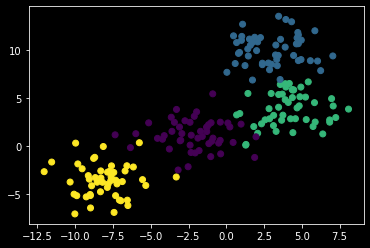

In [480]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1]);

мы видим, что в нашем наборе данных есть четыре уникальных кластера

In [481]:
model = KMeans(n_clusters=4)

In [482]:
scaler = MinMaxScaler()
X_MNIST = scaler.fit_transform(X_MNIST)
X_MNIST.shape

(70000, 784)

Также проверим результаты для результата сжатия размерности методом главных компонент набора данных с категориальными переменными

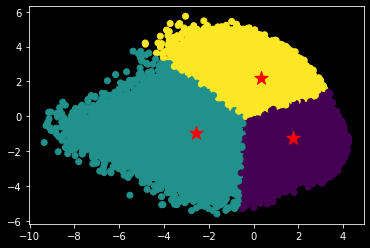

Мы остановились на итерации: 28


In [483]:
scaler_MNIST = MinMaxScaler()
X_MNIST = scaler.fit_transform(X_MNIST)

pca = PCA(n_components = 2)
pca.fit(X_MNIST)
X_new = pca.transform(X_MNIST)


kmeans   = KMeans(n_clusters=3, max_iter=1000, tol=0.00001)
c_labels = kmeans.fit_transform(X_new)

plt.scatter(X_new[:,0],X_new[:,1], c = c_labels);
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')
plt.show();
print('Мы остановились на итерации:',kmeans.iters)

Оцениваем связь кластеров с цифрами на изображениях при использовании К = 10

In [484]:
pd.crosstab(y_MNIST,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2
Метки,,,
0,121,6599,183
1,7857,6,14
2,3218,3053,719
3,3809,3007,325
4,591,120,6113
5,2304,2735,1274
6,2143,3024,1709
7,963,28,6302
8,3871,1950,1004


# **Набор данных Cars_Voldova**

## **Загрузка данных на Google Drive**

In [485]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean (2).csv


## **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [486]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [487]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [488]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year'] 

## **Кластеризация k-средних**

In [489]:
df_num = df[num_columns].copy()
scaler_cars = MinMaxScaler()
X_cars = scaler.fit_transform(df_num)
X_cars.shape

(32220, 5)

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X_cars, y, test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25776, 5), (6444, 5), (25776,), (6444,))

In [580]:
n_clusters = 4
centroids_cars = init_centroids(X_cars, n_clusters)
print(centroids_cars)

[[0.84       0.27992799 0.375      0.06763527 0.62146515]
 [0.84       0.18991899 0.26270833 0.04709419 0.42106435]
 [0.58       0.14791479 0.373125   0.06913828 0.13281108]
 [0.4        0.26992699 0.29166667 0.01202405 0.17253863]]


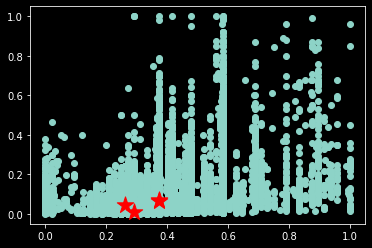

In [581]:
plt.scatter(X_cars[:, 2], X_cars[:, 3])
plt.scatter(centroids_cars[:, 2], centroids_cars[:, 3], marker='*', s=300, c='red')
plt.show()

Проведем первую кластеризацию.

In [582]:
def predict(X, n_clusters, centroids):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label

посмотрим как распределились результаты кластеризации

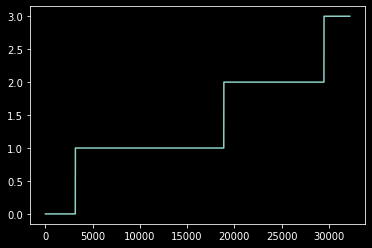

In [583]:
cluster_label_cars=predict(X_cars, n_clusters, centroids_cars)
plt.plot(np.sort(np.copy(cluster_label_cars)));

Проверим результаты первой кластеризации

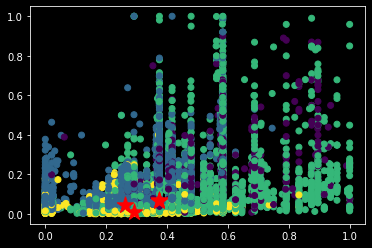

In [584]:
plt.scatter(X_cars[:, 2], X_cars[:, 3], c = cluster_label_cars, )
plt.scatter(centroids_cars[:, 2], centroids_cars[:, 3], marker='*', s=300, c='red')
plt.show()

Выберем новые центроиды

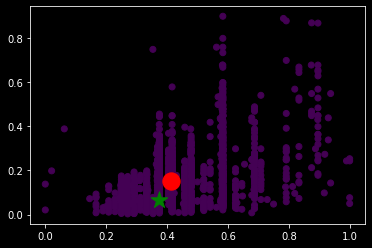

In [585]:
c_idxs = np.flatnonzero(cluster_label_cars==0)
cluster_zero = X_cars[c_idxs]
new_centroid_cars = cluster_zero.mean(axis = 0)
plt.scatter(cluster_zero[:, 2], cluster_zero[:, 3], c = cluster_label_cars[c_idxs])
plt.scatter(new_centroid_cars[2], new_centroid_cars[3], marker='o', s=300, c='red')
plt.scatter(centroids_cars[0, 2], centroids_cars[0, 3], marker='*', s=300, c='green');

Проведем такую операцию для всех кластеров.

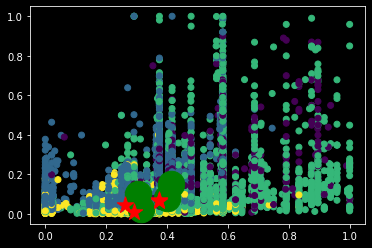

In [586]:
old_centroids_cars = np.copy(centroids_cars)

for k in range(n_clusters):
    c_idxs = np.flatnonzero(cluster_label_cars==k)
    centroids_cars[k] = X_cars[c_idxs].mean(axis = 0)
    
plt.scatter(X_cars[:, 2], X_cars[:, 3], c = cluster_label_cars)
plt.scatter(centroids_cars[:,2], centroids_cars[:,3], marker='o', s=700, c='green')
plt.scatter(old_centroids_cars[:, 2], old_centroids_cars[:, 3], marker='*', s=300, c='red');


In [587]:
def delta_centroids(centroids_cars,old_centroids_cars):
  return (distance(centroids_cars,old_centroids_cars)/distance(old_centroids_cars, np.mean(old_centroids_cars))).mean()

delta_centroids(centroids_cars,old_centroids_cars)

0.20602932534430224

In [588]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01):
    
    dcentr = np.inf
    
    for i in range(max_iter):
        
        old_centroids = np.copy(centroids)
        cluster_label=predict(X, n_clusters, centroids)
        
        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)
        
        dcentr = delta_centroids(centroids,old_centroids)
        
        if dcentr<=tol:
            break
    
    print('Мы остановились на итерации:', i,'изменение центра кластеров: ',dcentr)
            
    return cluster_label

Мы остановились на итерации: 30


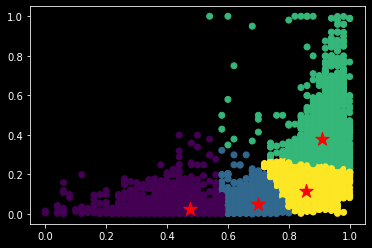

In [589]:
kmeans   = KMeans(n_clusters=4, max_iter=1000, tol=0.0001)
c_labels_cars = kmeans.fit_transform(X_cars[:,[0,3]])

print('Мы остановились на итерации:',kmeans.iters)

plt.scatter(X_cars[:, 0], X_cars[:, 3], c = c_labels_cars)

plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')

In [577]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 10, metric='hamming', n_jobs = 4)
knn.fit(X_train_pca, y_train)
y_train_predict_pca = knn.predict(X_train_pca)
y_test_predict_pca = knn.predict(X_test_pca)
err_train_pca = np.mean(y_train != y_train_predict_pca)
err_test_pca  = np.mean(y_test  != y_test_predict_pca)
print(err_train_pca)
print(err_test_pca)

0.9009821428571428
0.903


In [592]:
y = df['Transmission']

In [593]:
pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3
Метки,,,,
Automatic,1844,8013,4253,590
Manual,25,5350,8314,3831
